<h1 align='center' style="color: blue;">Supervised Learning - Part III</h1>

In [1]:
# Basic models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## 1. Generalization, Overfitting, Underfitting

### 1.1. Bias vs. Variance

<p>The main goal in developing prediction models is to predict unseen data. However the complexity level of the train model can play a major role in generalization of trained models to tested models. If the train model be very simple then the model suffers from <u>high bias</u>. In the high bias case, the predictive model has a low accuracy in prediction of both in-sample (train) and out-of-sample (test) data. On the other hand, if the train model be very complex then the model suffers from <u>high variance</u>. In the high variance case, the predictive model has a high accuracy in prediction of in-sample (train) data but low accuracy in prediction of out-of-sample (test) data.</p>

<p>Let's see an example using a generated dataset.</p>

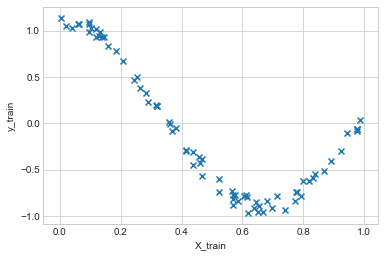

In [5]:
def make_data(N):
    rng = np.random.RandomState(0)
    X = np.sort(rng.rand(N))
    y = np.cos(1.5 * np.pi * X) + rng.rand(N)*.2
    X = X.reshape(N,1)
    return X, y

X, y = make_data(100)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

plt.scatter(X_train, y_train, marker='x')
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.show()

<p>Let's train a simple regression model and a complicated polynomial regression.</p>

In [8]:
# simple regression
from sklearn.linear_model import LinearRegression
model_sim_reg = LinearRegression()
model_sim_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs): 
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

model_pol_reg = PolynomialRegression(degree=15)
model_pol_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=15, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

<p>Let's visualize the fitted line in each case</p>

Text(0.5,1,'high-variance')

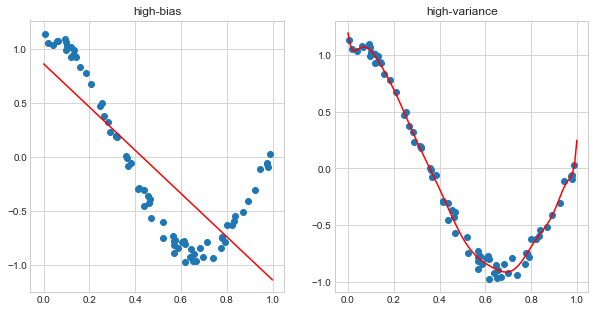

In [17]:
x_line = np.linspace(0, 1, 100)
x_line = x_line.reshape(100,1)
y_line_simp_reg = model_sim_reg.predict(x_line)
y_line_pol_reg = model_pol_reg.predict(x_line)

fig, ax = plt.subplots(1,2, figsize=(10,5))       
ax[0].scatter(X_train, y_train)
ax[0].plot(x_line, y_line_simp_reg, c='red')
ax[0].set_title("high-bias")

ax[1].scatter(X_train, y_train)
ax[1].plot(x_line, y_line_pol_reg, c='red')
ax[1].set_title("high-variance")

<p>Let's check the performance of predictive models using test and train sets:</p>

In [18]:
# simple regression performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_train_hat  = model_sim_reg.predict(X_train)
y_test_hat  = model_sim_reg.predict(X_test)

print("Mean Squared Error in-sample:", mean_squared_error(y_train,y_train_hat))
print("Mean Squared Error out_of-sample:", mean_squared_error(y_test,y_test_hat))

Mean Squared Error in-sample: 0.18777062855312965
Mean Squared Error out_of-sample: 0.20974908027473224


In [19]:
# poly nomial regression performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_train_hat  = model_pol_reg.predict(X_train)
y_test_hat  = model_pol_reg.predict(X_test)

print("Mean Squared Error in-sample:", mean_squared_error(y_train,y_train_hat))
print("Mean Squared Error out_of-sample:", mean_squared_error(y_test,y_test_hat))

Mean Squared Error in-sample: 0.002251392219181256
Mean Squared Error out_of-sample: 0.004571332779426402


<p><b>Note:</b> The main question is how to chose the best model? How we should decide about the level of complexity in our model? The answer is the best model is a trade off between bias and variance. You need to check models with different level of complexity and check the performance.</p>

<p>The following picture can provide a great view on the selection of the best model.</p>

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png" /> 

<p>Let's check the performance of models with different level of complexity for our last example and draw validation curve</p>

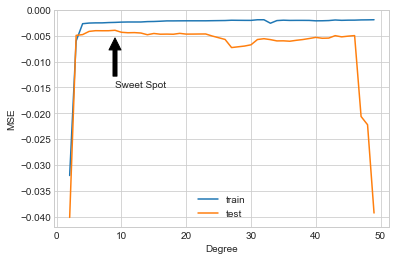

In [25]:
degree = range(2,50)
MSE_score_train = []
MSE_score_test = []

for i in degree:
    model = PolynomialRegression(degree=i).fit(X_train, y_train)
    y_train_hat  = model.predict(X_train)
    y_test_hat  = model.predict(X_test)
    MSE_score_train.append(-1 * mean_squared_error(y_train,y_train_hat))
    MSE_score_test.append(-1 * mean_squared_error(y_test,y_test_hat))
    
plt.plot(degree,  MSE_score_train, label='train')
plt.plot(degree,  MSE_score_test, label='test')
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()

plt.annotate('Sweet Spot', xy = (9, -.005), xytext=(9, -.015),
            arrowprops = dict(facecolor='black', shrink = 0.05));

### 1.2. Learning Curve

<p>Other than the level of complexity, the size of train dataset can play an important role in selection of an optimal model. Generally speaking, access to more data can help us to creat a better model. But the main question is how we should understand that we need additional training data or not? </p>

<p>In order to answer the above question, you need to use learning curve and draw the performance of your predictive model on both training and testing data using different training size.</p>

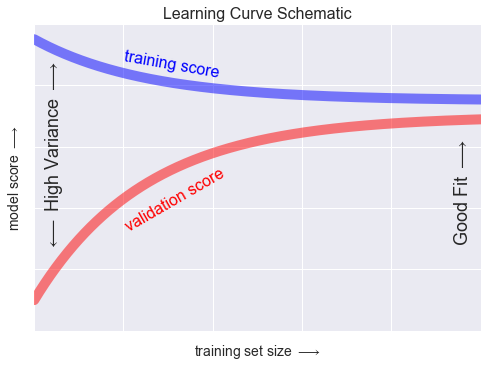

<p><b>Example:</b> In the last example, consider a polynomial model with degree of 8. Try models with different train size and draw the learning curve.</p>

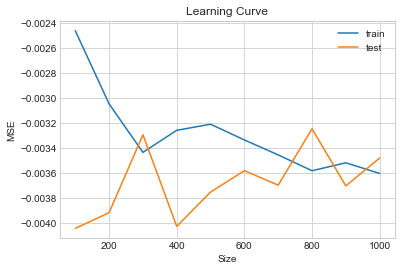

In [32]:
size = [100,200,300,400,500,600,700,800,900,1000]
MSE_score_train = []
MSE_score_test = []

for N in size:
    # Generate data with size N
    X, y = make_data(N)
    # Split data to rianing and testing 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    # Fit polynomial model with degree 8
    model = PolynomialRegression(degree=8).fit(X_train, y_train)
    # Predict for in-sample data
    y_train_hat  = model.predict(X_train)
    # Predict for out-of-sample data
    y_test_hat  = model.predict(X_test)
    # Compute scores
    MSE_score_train.append(-1 * mean_squared_error(y_train,y_train_hat))
    MSE_score_test.append(-1 * mean_squared_error(y_test,y_test_hat))
    
plt.plot(size,  MSE_score_train, label='train')
plt.plot(size,  MSE_score_test, label='test')
plt.xlabel("Size")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.legend();    

## 2. Decision Tree 

<p>A decision tree is a binary tree where each node in the tree either represents a question or a terminal node (leaf). The main idea is to find answer (class) with series of binary questions similar to game of 20 questions. in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes. The main challenge is to decide which questions to ask at each step. The questions are like "<u>Is feature <i>i</i> larger than value <i>a</i>?</u>"</p>

<p><b>Note:</b> There are two popular methods to select the right question: 1. <b>Gini impurity</b> (our focus) and 2. <b>Entropy</b></p>

<p>Gini impurity can be computed as :</p>
<div style='text-align:center;'>$G(k) = \sum_{i=1}^{m} {p(i)\times (1-p(i))}$</div>

In [37]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
# Install graphviz
import sys
!conda install --yes --prefix "{sys.prefix}" python-graphviz

Solving environment: done

# All requested packages already installed.



In [58]:
import graphviz

dot_data = export_graphviz(model, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph;

/anaconda3/lib/python3.7/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


<p><b>Question:</b> What is the in-sample and out-of-sample accuracy?</p>

In [59]:
from sklearn.metrics import accuracy_score

y_train_hat  = model.predict(X_train)
y_test_hat  = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100

out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100

print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  97.36842105263158


<p><b>Note:</b> you can also find the importance of features in decision three classification using <b style="color:blue">feature_importances_</b> property of the model.</p>

In [60]:
print(iris.feature_names)
model.feature_importances_

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0.02014872, 0.02014872, 0.40530263, 0.55439994])

<p><b>Question:</b> How decision tree is different from other types of classification methods?</p>

<p>Notice that as the depth increases, we tend to get overfitting result; for example, at a depth of four, the model produces rules that can explain just one observation. It’s clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise properties of the data. That is, this decision tree, even at only four levels deep, is clearly overfitting our data.</p>

<p><b>Note:</b> One possible solution is to limit the depth of tree to a certian level. Let's apply that to the above example:</p>

In [64]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fix the max_depth to 3
model = DecisionTreeClassifier(max_depth=3)
# fit the model
model.fit(X_train, y_train)

# Let's check the performance of the model using 
# In-sample and out-of-sample data
y_train_hat  = model.predict(X_train)
y_test_hat  = model.predict(X_test)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  98.21428571428571
Out-of-sample Accuracy:  97.36842105263158


<p><b>In class exercise: </b> Use Wild dataset containing several thousand collated photos of various public figures and creat a decision tree model for prediction.</p>
<ul>
    <li>Use Isomap to reduce the number of dimensions to 150.</li>
    <li>Use 70% of data for training and 30% for testing</li> 
    <li>Use full tree and compare the accuracy of in-sample and out-of-sample data</li>
    <li>Use max_depth of 5,6, and 7 to creat different models. Which one has a better performance?</li>
    <li>Use Grid Search with Cross Validation to find the optimal max_depth</li>
</ul>

In [65]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [66]:
X.shape

(150, 4)

In [101]:
from sklearn.manifold import Isomap
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Iso = Isomap(n_components=150)
X = faces.data
faces.data.shape

(1348, 2914)

In [156]:
Iso = Isomap(n_components=150)
X = faces.data
y = faces.target
projected_X = Iso.fit_transform(X)
projected_X.shape

(1348, 150)

In [155]:
from sklearn.manifold import Isomap
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

X = faces.data
y = faces.target

embedding = Isomap(n_components=150)
X_transformed = embedding.fit_transform(X)

X_train, y_train, y_train,y_test = train_test_split(X_transformed, y, random_state=0)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_train_hat  = model.predict(X_train)
y_test_hat  = model.predict(X_test)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

model = DecisionTreeClassifier()
param_grid = {'max_depth':[5,6,7]}
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
grid = GridSearchCV(model, param_grid, cv=cv, return_train_score=True, scoring='accuracy')
grid.fit(X_train, y_train)
print("best Parameter: {}".format(grid.best_params_))
print("best Cross Validation score:{}".format(grid.best_score_))
                                  
bestModel = grid.best_estimator_
y_train_hat = bestModel.predict(X_train)
y_test_hat = bestModel.predict(X_test)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  33.82789317507419
best Parameter: {'max_depth': 5}
best Cross Validation score:0.3788328387734916
In-sample Accuracy:  53.21463897131553
Out-of-sample Accuracy:  36.795252225519285


<p><b>Note:</b> One other solution for over fitting in decion tree is to train multiple trees using different subset of data. The idea is that multiple overfitting estimators can be combined to reduce the effect of this overfitting (Bagging Ensembles). Bagging makes use of an ensemble of parallel estimators, each of which overfits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a <u>random forest</u>.</p>

### 2.1. Random Forest

<p><b>Note:</b> In order to creat Random Forest model you have two options in Scikit learn:
<ol>
    <li>Use bagging classification manually using Scikit-Learn’s Bagging</li>
    <li>Use optimized ensemble of randomized decision trees that is implemented in the RandomForestClassifier estimator, which takes care of all the randomization automatically.</li>
</ol>
</p>

<p>Let's use the manual version first.</p>

In [135]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier

# Use Iris dataset once again
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# initialize decision tree
tree = DecisionTreeClassifier()
# initialize bagging with 100 decision trees (each tree use 80% of training data)
bag = BaggingClassifier(tree, n_estimators=100, 
                        max_samples=0.8, random_state=0)

# fit the bagging model
bag.fit(X_train,y_train)

# let's check in-sample and out-of-sample accuracy
y_train_hat  = bag.predict(X_train) #in-sample

y_test_hat  = bag.predict(X_test) # out-of-sample

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100

out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100

print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc);

In-sample Accuracy:  99.10714285714286
Out-of-sample Accuracy:  97.36842105263158


Let's use the RandomForestClassifier

In [136]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train,y_train)

# let's check in-sample and out-of-sample accuracy
y_train_hat  = model.predict(X_train) #in-sample

y_test_hat  = model.predict(X_test) #out-of-sample

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100

out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100

print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  97.36842105263158


<p><b>In class exercise:</b> Use random forest to creat a predictive model for Wild dataset. Compare your result with the model in last exercise.</p>
<ul>
    <li>Use Isomap to reduce the number of dimensions to 150.</li>
    <li>Use 70% of data for training and 30% for testing</li> 
    <li>Compute the accuracy for both in-sample and out-of-sample data</li>
</ul>

In [137]:
from sklearn.datasets import fetch_lfw_people 

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [159]:
from sklearn.ensemble import RandomForestClassifier

embedding = Isomap(n_components=150)
X_transformed = embedding.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=0)

model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train,y_train)

# let's check in-sample and out-of-sample accuracy
y_train_hat  = model.predict(X_train)
y_test_hat  = model.predict(X_test)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100

print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  41.246290801186944


### 2.2. Random Forest Regression

<p>In the previous section, we used random forest in the context of classification. But you can also use random forest for the regression. The estimator to use for it is the <b style='color:blue'>RandomForestRegressor</b>.</p>

In [160]:
# let's use boston dataset once again
from sklearn import datasets

boston_dataset = datasets.load_boston()
feature_names = boston_dataset.feature_names

X = boston_dataset.data 
y = boston_dataset.target  

In [173]:
from sklearn.ensemble import RandomForestRegressor

# initialize the model
forest = RandomForestRegressor(n_estimators = 200)

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the model using train data
forest.fit(X_train,y_train)

# predict with out-of-sample data
y_test_hat = forest.predict(X_test)

# check the performace
mean_squared_error(y_test,y_test_hat)

17.170975933070864

<p><b>Example:</b> use the linear regression and compare your result with random forest. Which one perform better?</p>

In [170]:
# write your code here
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)

y_test_hat = LR.predict(X_test)
mean_squared_error(y_test,y_test_hat)

29.790559164238488

## 3. Neural Networks

<p>Neural Networks can be viewed as generalization of linear models that perform multiple stages of processingto come to a decision.</p>

<img src="https://cdn-images-1.medium.com/max/1600/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png" width=400px />

The complete overview of neural networks requires several discussion sessions. Therefore, the complete over view of this classifier is not in the scope of this course. However, in this section, we briefly discuss about this tool. 

<p><b>Note:</b> The main power of neural networks is in using large datasets.</p>

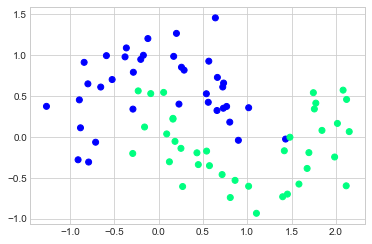

In [175]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = .25, random_state = 0)

# stratify = y allows you to select train data 
# from each class proportionally
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y , random_state=0)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='winter');

In [178]:
#initialize the model
model = MLPClassifier(solver='lbfgs',random_state=0)

model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [179]:
# Let's check the accuracy
y_train_hat = model.predict(X_train) #in-sample
y_test_hat = model.predict(X_test) #out-of-sample

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100

print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)


In-sample Accuracy:  100.0
Out-of-sample Accuracy:  92.0


<p><b>Exercise:</b> Draw the decision boundary for the above predictor.</p>

In [196]:
# write your code here

<p><b>Note: </b> By default MLPClassifier uses one hidden layer with 100 nodes to form the neural network classifier. For the above example you can use less number of nodes and still get a good result. Let's test with 10. </p>

In [186]:
model = MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[10])
model.fit(X_train,y_train)

# check the accuracy
y_train_hat = model.predict(X_train) #in-sample
y_test_hat = model.predict(X_test) #out-of-sample

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100

print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  92.0


<p><b>Question: </b> How do you interpret the result?</p>

Let's use multiple layers and check the result.

In [187]:
model = MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[5,2])
model.fit(X_train,y_train)

# check the accuracy
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  100.0


<p><b>Exercise:</b> Draw the decision boundary for the above predictor and compare it with the first one.</p>

In [197]:
# Write your code here


<p><b>In class exercise:</b> Use Neural Networks to creat a predictive model for Wild dataset. </p>
<ul>
    <li>Use Isomap to reduce the number of dimensions to 150.</li>
    <li>use different combination of hidden layers with different sizes</li>
    <li>Use 70% of data for training and 30% for testing</li> 
    <li>Compute the accuracy for both in-sample and out-of-sample data</li>
</ul>

In [198]:
# Write your code here
from sklearn.datasets import fetch_lfw_people 

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [238]:
from sklearn.manifold import Isomap
from sklearn.neural_network import MLPClassifier

X = faces.data
y = faces.target

embedding = Isomap(n_components=150)
transformed_X = embedding.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split (transformed_X, y, test_size = 0.3 , random_state=0)

model = MLPClassifier(solver='lbfgs', activation='relu', random_state=0,hidden_layer_sizes=[7,5,3])    

model.fit(X_train,y_train)

y_train_hat = model.predict(X_train) #in-sample
y_test_hat = model.predict(X_test) #out-of-sample     
                      
in_sample_acc = accuracy_score(y_train, y_train_hat)
out_of_sample_acc = accuracy_score(y_test, y_test_hat)

print("Accuracy of in_sample data {}".format(in_sample_acc))
print("Accuracy of Out_of_sample data {}".format(out_of_sample_acc));

Accuracy of in_sample data 0.391304347826087
Accuracy of Out_of_sample data 0.39753086419753086
